In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('diabetes_dataset.csv')

In [3]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.select_dtypes(['int64','float64']).corr()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
year,1.000000,-0.003303,-0.004282,-0.007287,0.010585,0.004175,-0.003139,-0.003787,0.001834,-0.001861,-0.000460,0.002985,-0.003444
age,-0.003303,1.000000,-0.002249,0.003934,0.003746,0.001929,-0.007338,0.251194,0.233375,0.337426,0.101398,0.110690,0.258032
race:AfricanAmerican,-0.004282,-0.002249,1.000000,-0.251825,-0.250770,-0.250880,-0.251754,-0.001207,-0.000668,-0.001249,0.001339,0.002268,0.004372
race:Asian,-0.007287,0.003934,-0.251825,1.000000,-0.249105,-0.249215,-0.250083,0.004015,0.006194,0.005240,-0.000463,0.000222,0.003780
race:Caucasian,0.010585,0.003746,-0.250770,-0.249105,1.000000,-0.248171,-0.249035,0.000505,-0.001224,-0.002114,-0.004086,0.004140,-0.001747
race:Hispanic,0.004175,0.001929,-0.250880,-0.249215,-0.248171,1.000000,-0.249145,0.001357,-0.000780,0.002363,0.000465,-0.002712,-0.001314
race:Other,-0.003139,-0.007338,-0.251754,-0.250083,-0.249035,-0.249145,1.000000,-0.004661,-0.003524,-0.004236,0.002730,-0.003924,-0.005116
hypertension,-0.003787,0.251194,-0.001207,0.004015,0.000505,0.001357,-0.004661,1.000000,0.121255,0.147667,0.080942,0.084424,0.197814
heart_disease,0.001834,0.233375,-0.000668,0.006194,-0.001224,-0.000780,-0.003524,0.121255,1.000000,0.061198,0.067592,0.070063,0.171720
bmi,-0.001861,0.337426,-0.001249,0.005240,-0.002114,0.002363,-0.004236,0.147667,0.061198,1.000000,0.083003,0.091267,0.214359


In [6]:
x=df[['hbA1c_level','blood_glucose_level']]

In [7]:
y=df.diabetes

In [8]:
x

,hbA1c_level,blood_glucose_level
0,5.0,100
1,5.0,90
2,4.8,160
3,4.0,159
4,6.5,90
...,...,...
99995,6.5,90
99996,5.7,100
99997,6.2,158
99998,6.0,155


In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 99986, dtype: int64

In [10]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
x_train

,hbA1c_level,blood_glucose_level
83704,6.0,145
5086,4.5,90
25782,4.8,200
61020,4.8,100
6015,6.0,100
...,...,...
85785,4.5,90
96588,5.7,155
42620,4.5,160
32188,5.0,90


In [12]:
x_test

83704    0
5086     0
25782    0
61020    0
6015     0
        ..
85785    0
96588    0
42620    0
32188    0
90285    0
Name: diabetes, Length: 79988, dtype: int64

In [13]:
sns.scatterplot(x=x_train['blood_glucose_level'],y=y_train)

ValueError: Data must be 1-dimensional, got ndarray of shape (19998, 2) instead

In [14]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg=LogisticRegression()

In [17]:
lg.fit(x_train,x_test)

LogisticRegression()

In [18]:
pred=lg.predict(y_train)

In [19]:
lg.predict([[4.5,80]])

C:\Program Files\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [20]:
y_test

76263    0
76938    0
33323    0
56714    0
25824    0
        ..
62606    0
75650    0
86416    0
44781    0
32417    0
Name: diabetes, Length: 19998, dtype: int64

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y_test,pred)

0.04605460546054605

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,pred)

0.9539453945394539

 df.head()

In [25]:
 df.sample(5)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
63165,2019,Male,41.0,New Jersey,0,0,0,1,0,0,0,never,27.32,6.6,158,0
81739,2016,Female,47.0,Rhode Island,0,0,0,1,0,0,0,No Info,27.32,4.5,80,0
71011,2019,Female,21.0,North Dakota,0,0,0,0,1,0,0,current,24.98,4.5,159,0
80387,2019,Female,18.0,Puerto Rico,0,0,0,0,1,0,0,No Info,31.56,6.1,160,0
47860,2015,Male,36.0,Minnesota,0,0,0,1,0,0,0,not current,46.12,6.2,130,1


In [26]:
lg.predict([[8.2,220]])

C:\Program Files\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

<Axes: >

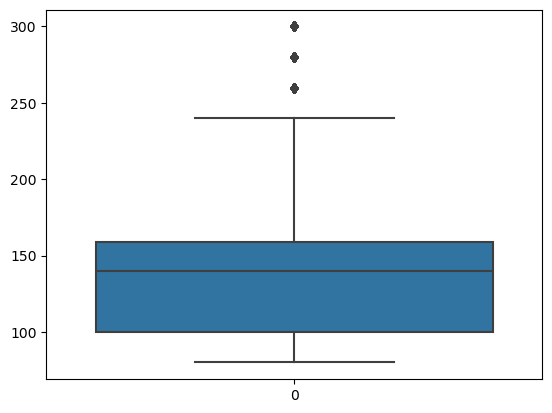

In [27]:
sns.boxplot(df['blood_glucose_level'])

<Axes: >

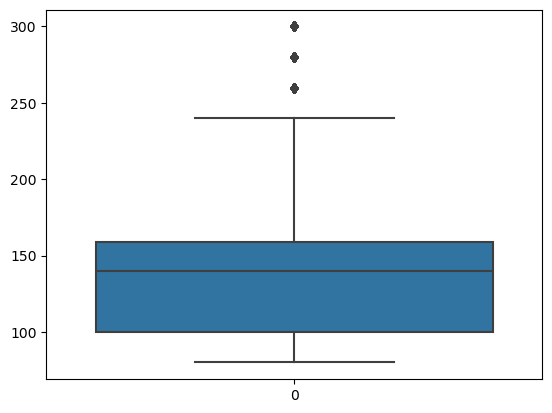

In [28]:
sns.boxplot(df['blood_glucose_level'])

In [29]:
def remove_outlier(data,column):
    q1=np.percentile(df[column],25)
    q3=np.percentile(df[column],75)
    iqr=q3-q1
    minimun=q1-1.5*iqr
    maximum=q3+1.5*iqr
    return df[(df[column]>=minimun) & (df[column]<=maximum)]
    
    

In [30]:
df=remove_outlier(df,'blood_glucose_level')

In [31]:
df.hbA1c_level.iloc[0]

5.0

In [32]:
df.hbA1c_level.max()

9.0

In [33]:
df.hbA1c_level.describe()


count    97948.000000
mean         5.498622
std          1.051305
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: hbA1c_level, dtype: float64

In [34]:
len(df)/50

1958.96

In [35]:
df.hbA1c_level.iloc[1999]

6.5

In [36]:
np.percentile(df['hbA1c_level'],75)

6.2

<Axes: >

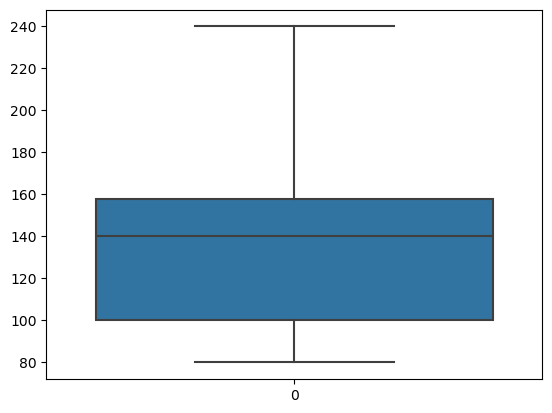

In [37]:
sns.boxplot(df['blood_glucose_level'])

<Axes: >

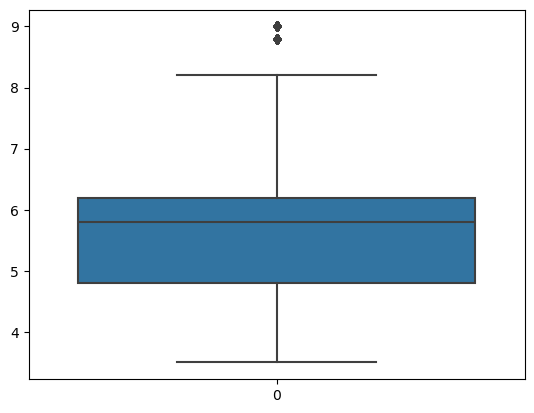

In [38]:
sns.boxplot(df['hbA1c_level'])

In [39]:
x_train,y_train,x_test,y_test=train_test_split(df[['hbA1c_level','blood_glucose_level']],df['diabetes'])

In [40]:
lr1=LogisticRegression()

In [41]:
lr1.fit(x_train,x_test)

LogisticRegression()

In [42]:
pred=lr1.predict(y_train)

In [43]:
y_test

29081    0
7420     0
11137    0
58626    0
39013    0
        ..
91364    0
43303    0
31211    0
37927    0
75711    0
Name: diabetes, Length: 24487, dtype: int64

In [44]:
accuracy_score(y_test,pred)

0.9596112222812104

In [ ]:
mean_squared_error(y_test,pred)

In [45]:
df.sample(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
31688,2016,Male,6.0,Iowa,1,0,0,0,0,0,0,No Info,21.30,6.6,80,0
39437,2019,Female,70.0,Louisiana,0,0,0,0,1,1,0,former,34.50,5.8,100,0
54255,2015,Male,46.0,Montana,0,0,1,0,0,0,0,not current,30.07,5.8,145,1
26027,2019,Female,22.0,Idaho,1,0,0,0,0,0,0,No Info,39.86,5.7,100,0
78237,2015,Female,33.0,Pennsylvania,0,0,0,1,0,0,0,never,28.87,6.6,85,0
75473,2019,Female,39.0,Oklahoma,1,0,0,0,0,0,0,No Info,27.32,5.0,130,0
8136,2016,Female,61.0,California,0,1,0,0,0,0,0,never,33.75,6.1,80,0
20412,2015,Female,22.0,Georgia,1,0,0,0,0,0,0,never,23.46,3.5,90,0
79134,2019,Male,70.0,Pennsylvania,0,0,1,0,0,0,0,current,26.40,4.5,130,0
14591,2019,Female,80.0,Delaware,1,0,0,0,0,0,0,No Info,22.65,6.1,85,0


In [ ]:
lr1.predict([[,200]])

In [47]:
def Model(hbA1c_level,blood_glucose_level):
    pred=lr1.predict([[hbA1c_level,blood_glucose_level]])
    if pred==0:
        print('diabetes nahi hai')
    else:
        print('diabetes hai')

In [48]:
Model(2,200)

diabetes nahi hai


C:\Program Files\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
import pickle

In [ ]:
pickle.dump(lr1,open('model','wb'))

In [ ]:
import plotly.express as s

In [ ]:
fig=s.scatter_3d(x=df['hbA1c_level'],y=df['blood_glucose_level'],z=df['hypertension'],color=df['diabetes'].astype('str'))
fig.u


In [65]:
df2=sns.load_dataset('tips')

In [66]:
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [70]:
df2.drop_duplicates(inplace=True)

<Axes: xlabel='tip', ylabel='total_bill'>

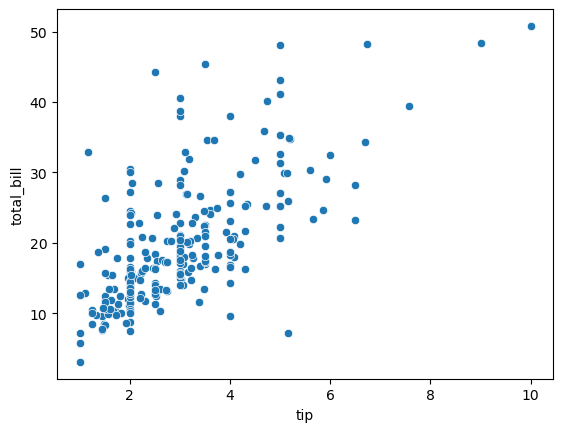

In [82]:
sns.scatterplot(x=df['tip'],y=df['total_bill'])

In [74]:
df2=remove_outlier(df2,'tip')

In [79]:
df2=remove_outlier(df2,'total_bill')

In [77]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

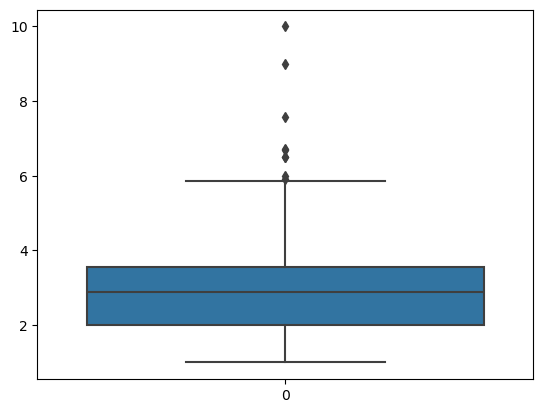

In [91]:
sns.boxplot(df['tip'])

In [97]:
def outlier(df,column):
    q1=np.percentile(df[column],25)
    q3=np.percentile(df[column],75)
    iqr=q3-q1
    minimn=q1-1.5*iqr
    maximum=q3+1.5*iqr
    
    return df[(df[column]>=minimn) & (df[column]<=maximum)]

In [99]:
outlier(df2,'tip')

-0.22750000000000004 5.7125


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [96]:
outlier(df2,'total_bill')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
li1=LinearRegression()

In [222]:
x_train,y_train,x_test,y_test=train_test_split(df['total_bill'],df['tip'],test_size=0.2)

In [146]:
y_test

29     3.00
129    2.18
95     4.73
16     1.67
158    2.61
220    2.20
112    4.00
27     2.00
195    1.44
182    3.50
133    2.00
164    3.00
21     2.75
14     3.02
221    3.48
121    1.68
198    2.00
191    4.19
20     4.08
94     3.25
70     1.97
189    4.00
225    2.50
224    1.58
135    1.25
37     3.07
155    5.14
81     3.40
160    3.50
63     3.76
88     5.85
193    2.02
188    3.50
130    1.50
179    3.55
151    2.00
62     1.98
61     2.00
3      3.31
26     2.00
7      3.12
115    3.50
118    1.80
93     4.30
241    2.00
65     3.15
119    2.92
19     3.35
109    4.00
Name: tip, dtype: float64

In [125]:
y

50     12.54
192    28.44
223    15.98
78     22.76
143    27.05
35     24.06
241    22.67
175    32.90
190    15.69
224    13.42
131    20.27
111     7.25
12     15.42
199    13.51
85     34.83
152    17.26
137    14.15
208    24.27
155    29.85
168    10.59
75     10.51
122    14.26
3      23.68
53      9.94
11     35.26
118    12.43
116    29.93
144    16.43
140    17.47
149     7.51
163    13.81
172     7.25
45     18.29
179    34.63
2      21.01
150    14.07
202    13.00
1      10.34
113    23.95
106    20.49
16     10.33
209    12.76
215    12.90
188    18.15
41     17.46
Name: total_bill, dtype: float64

In [237]:
li2=LinearRegression()

In [239]:
li2.fit([x_train],[x_test])

LinearRegression()

In [260]:
li2.predict([[1.2]])

ValueError: X has 1 features, but LinearRegression is expecting 195 features as input.

In [251]:
x_train

14     14.83
172     7.25
188    18.15
71     17.07
173    31.85
       ...  
232    11.61
183    23.17
187    30.46
100    11.35
16     10.33
Name: total_bill, Length: 195, dtype: float64

In [182]:
pri=pri.reshape(195)

In [183]:
pri.shape

(195,)

In [241]:
x_test.shape

(195,)

In [242]:
y_train.shape

(49,)

In [243]:
y_test.shape

(49,)

In [244]:
x_train.shape

(195,)

In [255]:
x_train

14     14.83
172     7.25
188    18.15
71     17.07
173    31.85
       ...  
232    11.61
183    23.17
187    30.46
100    11.35
16     10.33
Name: total_bill, Length: 195, dtype: float64

In [256]:
x_test

14     3.02
172    5.15
188    3.50
71     3.00
173    3.18
       ... 
232    3.39
183    6.50
187    2.00
100    2.50
16     1.67
Name: tip, Length: 195, dtype: float64

In [257]:
y_train

55     19.49
102    44.30
85     34.83
107    25.21
149     7.51
122    14.26
181    23.33
20     17.92
151    13.13
62     11.02
110    14.00
96     27.28
112    38.07
54     25.56
42     13.94
92      5.75
239    29.03
33     20.69
233    10.77
59     48.27
140    17.47
83     32.68
130    19.08
28     21.70
67      3.07
236    12.60
69     15.01
190    15.69
210    30.06
48     28.55
32     15.06
3      23.68
153    24.55
12     15.42
81     16.66
160    21.50
159    16.49
38     18.69
52     34.81
202    13.00
191    19.81
0      16.99
72     26.86
47     32.40
217    11.59
39     31.27
24     19.82
63     18.29
126     8.52
Name: total_bill, dtype: float64

In [233]:
y_test

55     3.51
102    2.50
85     5.17
107    4.29
149    2.00
122    2.50
181    5.65
20     4.08
151    2.00
62     1.98
110    3.00
96     4.00
112    4.00
54     4.34
42     3.06
92     1.00
239    5.92
33     2.45
233    1.47
59     6.73
140    3.50
83     5.00
130    1.50
28     4.30
67     1.00
236    1.00
69     2.09
190    1.50
210    2.00
48     2.05
32     3.00
3      3.31
153    2.00
12     1.57
81     3.40
160    3.50
159    2.00
38     2.31
52     5.20
202    2.00
191    4.19
0      1.01
72     3.14
47     6.00
217    1.50
39     5.00
24     3.18
63     3.76
126    1.48
Name: tip, dtype: float64

In [258]:
y_test

55     3.51
102    2.50
85     5.17
107    4.29
149    2.00
122    2.50
181    5.65
20     4.08
151    2.00
62     1.98
110    3.00
96     4.00
112    4.00
54     4.34
42     3.06
92     1.00
239    5.92
33     2.45
233    1.47
59     6.73
140    3.50
83     5.00
130    1.50
28     4.30
67     1.00
236    1.00
69     2.09
190    1.50
210    2.00
48     2.05
32     3.00
3      3.31
153    2.00
12     1.57
81     3.40
160    3.50
159    2.00
38     2.31
52     5.20
202    2.00
191    4.19
0      1.01
72     3.14
47     6.00
217    1.50
39     5.00
24     3.18
63     3.76
126    1.48
Name: tip, dtype: float64